In [1]:
import pandas as pd
import numpy as np

In [ ]:
'''Import image of the Iris Dataset from Wikipedia so we have a frame of reference for the correct 
distribution of the values.'''

In [65]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1024px-Iris_dataset_scatterplot.svg.png")

In [ ]:
'''Read in the data_set. Two copies incase we mess one of the copies up.'''

In [22]:
df_original = pd.read_csv('iris-data.csv')
df = pd.read_csv('iris-data.csv')

In [ ]:
'''Check if the import worked and get an idea of the data.'''

In [77]:
df.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,5.7,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [ ]:
'''Analyse the types of data we are using.'''

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
'''Analyse the distribution of the data prior to cleaning. We can see some potential issues 
with the sepal_length_cm and petal_width_cm due to their respective low min values which 
may be outliers.'''

In [24]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
'''Convert Object to string.'''

In [20]:
df['class'] = df['class'].astype('str')

In [21]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [ ]:
'''Count the presence of NaN values in the dataset.'''

In [23]:
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [ ]:
'''Establish distribution of this specific column. Should we drop the NaN or replace with zeros?'''

In [64]:
print('mean',df.petal_width_cm.mean())
print('mode',df.petal_width_cm.mode())
print('max',df.petal_width_cm.max())
print('min',df.petal_width_cm.min())

mean 1.2365517241379318
mode 0    0.2
dtype: float64
max 2.5
min 0.1


In [46]:
df.petal_width_cm.shape[0]

150

In [ ]:
'''NaN make up only 3% of the dataset, and the replacing them with zeros make no sense, as no plants would 
be measured with a zero petal width.'''

In [49]:
df.petal_width_cm.isna().sum() / df.petal_width_cm.shape[0] * 100

3.3333333333333335

In [55]:
df.dropna(inplace = True)

In [56]:
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [ ]:
'''Sepal_length_cm has some values which are zeros, which is skewing the average. '''

In [70]:
df['sepal_length_cm'].mean()

5.670303448275863

In [ ]:
'''Here, we check the number of values below 2.0, which is lower than the 25% quartile, so we can assume any data
below this point could be considered erroneous.'''

In [72]:
df.sepal_length_cm[df.sepal_length_cm < 2.0].count()

5

In [73]:
df.sepal_length_cm = df.sepal_length_cm[df.sepal_length_cm > 2.0]

In [74]:
df['sepal_length_cm'].mean()

5.870714285714287

In [ ]:
'''Using the scatter matrix function, we can see our data mirrors the non erroneous dataset from Wikipedia.'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217F75DC8C8>,
      dtype=object)

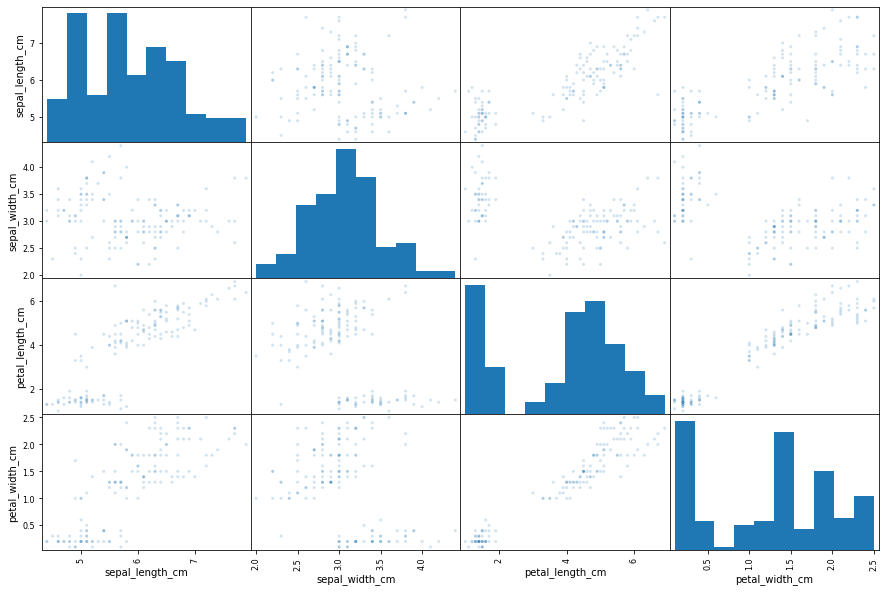

In [76]:
pd.plotting.scatter_matrix(df, alpha = 0.2, figsize = (15,10))